# Western Interior Basin Units

This notebook extracts the flooding extent of Laurentia for the Western Interior Basin, as defined within some time interval during the Cretaceous.

The output is a shapefile that is shown in Figure 2 of the main manuscript to help provide intuition about how the Macrostrat database records geospatial geologic information.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import pickle
from helper import *

import matplotlib.pyplot as plt

In [2]:
# choose North American Lambert projection
epsg = 2252
proj4 = 'epsg:%d' % epsg

In [3]:
# Macrostrat columns of North America
columns = load_shapefile('data/columns_2023-06.gpkg', 'col_id', project_id=1)
columns = columns.to_crs(proj4)

# outline of Laurentia
laurentia = gpd.read_file('gis/Laurentia/Laurentia.shp')
laurentia = laurentia.to_crs(proj4)

# Macrostrat columns within Laurentian outline defined above
laurentia_columns = gpd.sjoin(columns, laurentia, predicate='intersects')

In [5]:
units_seds, \
all_sed_frac, \
buffer_widths, \
margin_sed_frac, \
rings, ring_columns, \
n_ring_cols, \
interior_sed_frac, \
interiors, \
interior_columns, \
n_interior_cols = pickle.load(open('data/phanerozoic_coverage/Modified_marine_v6-no-quat', 'rb'))

Marine sediment presence by column for the user-defined time range for the WIB.

In [6]:
units_WIB = seds_by_column_and_age_range(units_seds, laurentia_columns, 120, 80, method='presence')

Sanity check plot.

<Axes: >

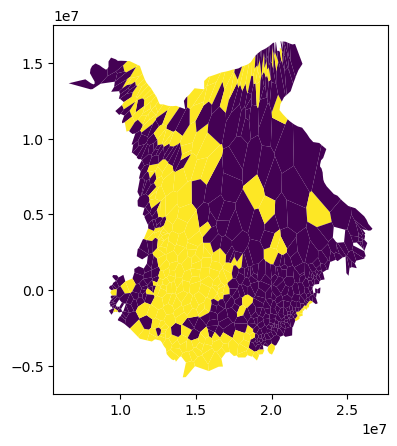

In [7]:
units_WIB.plot(column='presence')

Save shapefile.

In [8]:
units_WIB.to_file('gis/WIB_macrostrat.shp')